# Predicting Customer Churn for a Telecommunications Company

In [ ]:
# Problem Statement:- Predicting Customer Churn for a Telecommunications Company

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Reading CSV file


df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\Churn_Prediction_Data_Set\\Telcom-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# Checking for Statistical data

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [4]:
# Checking for Null Value

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# Checking for info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [7]:
for i in df.columns:
    print(f"unique {i} count: {df[i].nunique()}")
    print(df[i].unique())

unique customerID count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
unique gender count: 2
['Female' 'Male']
unique SeniorCitizen count: 2
[0 1]
unique Partner count: 2
['Yes' 'No']
unique Dependents count: 2
['No' 'Yes']
unique tenure count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
unique PhoneService count: 2
['No' 'Yes']
unique MultipleLines count: 3
['No phone service' 'No' 'Yes']
unique InternetService count: 3
['DSL' 'Fiber optic' 'No']
unique OnlineSecurity count: 3
['No' 'Yes' 'No internet service']
unique OnlineBackup count: 3
['Yes' 'No' 'No internet service']
unique DeviceProtection count: 3
['No' 'Yes' 'No internet service']
unique TechSupport count: 3
['No' 'Yes' 'No internet service']
unique StreamingTV count: 3
['No' 'Yes' 'No internet servic

In [8]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

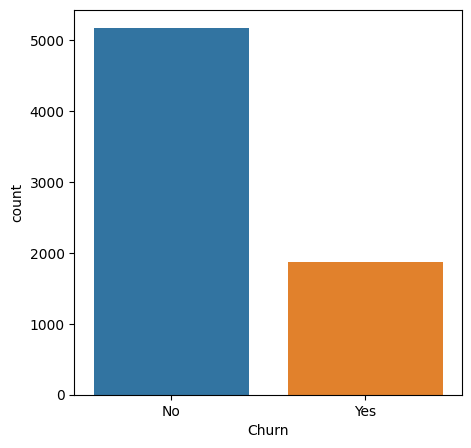

In [9]:
# Display a frequency distribuation for churn

plt.figure(figsize=(5,5))
fig = sns.countplot(x = df['Churn'])
fig

In [10]:
df.corr()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_53864\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SeniorCitizen,tenure,MonthlyCharges
SeniorCitizen,1.000000,0.016567,0.220173
tenure,0.016567,1.000000,0.247900
MonthlyCharges,0.220173,0.247900,1.000000


In [ ]:
# Columns removed

#     customerID: not relevant

# No action

#     SeniorCitizen

# Label encoding The following features are categorical and each take on 2 values (mostly yes/no) — therefore are transformed 
# to binary integers

#     gender
#     Partner
#     Dependents
#     Churn
#     PhoneService
#     PaperlessBilling

# One-Hot Encoding The following features are categorical, yet not ordinal (no ranking) but take on more than 2 values. For 
# each value, a new variable is created with a binary integer indicating if the value occured in a data entry or not (1 or 0).

#     MultipleLines
#     InternetService
#     OnlineSecurity
#     OnlineBackup
#     DeviceProtection
#     TechSupport
#     StreamingTV
#     StreamingMovies
#     Contract
#     PaymentMethod

# Min-Max Scaling Values of numerical features are rescaled between a range of 0 and 1. Min-max scaler is the standard 
# approach for scaling. For normally distributed features standard scaler could be used, which scales values around a mean of 
# 0 and a standard deviation of 1. For simplicity we use min-max scaler for all numerical features.

#     tenure
#     TotalCharges
#     MonthlyCharges

# Feature Engineering

In [11]:
# Making copy of DF

df1 = df.copy()
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df1 = df1.drop(columns='customerID', axis=1)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [13]:
# Generate new feature "Number_AdditionalServices" by summing up the number of add-on services consumed

service_list = ['OnlineSecurity','DeviceProtection','OnlineBackup', 'TechSupport', 'StreamingTV', 'StreamingMovies']

df1["Number_AdditionalServices"] = (df1[service_list] == 'Yes').sum(axis=1)

df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,2
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,5
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,4
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0


<Axes: xlabel='Number_AdditionalServices', ylabel='count'>

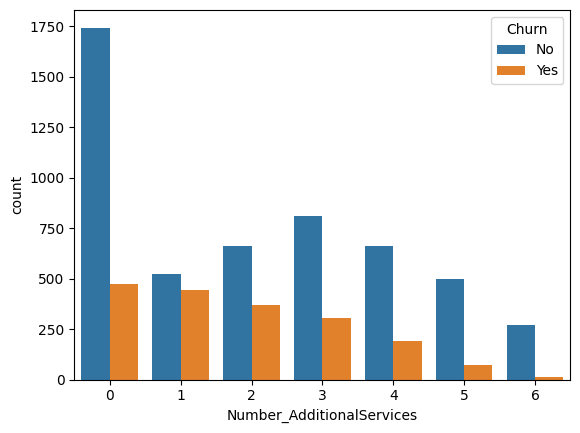

In [14]:
# Generate Count plot for new generated feature

sns.countplot(hue='Churn', x = 'Number_AdditionalServices', data=df1)

In [ ]:
#Plot insights:

    #The countplot shows a very high churn rate for customers that have 1 additional service.
    #Customers with a very high number of additional services do have a low churn rate.

In [15]:
# Changing data type of TotalCharges and tenure

df1['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df1

def feature_to_float(feature_list, df1):
    for i in feature_list:
        df1[i] = df1[i].astype(float)
        return df1
    
feature_to_float(['tenure'], df1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2
2,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,2
3,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3
4,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,5
7039,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,4
7040,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     7043 non-null   object 
 1   SeniorCitizen              7043 non-null   int64  
 2   Partner                    7043 non-null   object 
 3   Dependents                 7043 non-null   object 
 4   tenure                     7043 non-null   float64
 5   PhoneService               7043 non-null   object 
 6   MultipleLines              7043 non-null   object 
 7   InternetService            7043 non-null   object 
 8   OnlineSecurity             7043 non-null   object 
 9   OnlineBackup               7043 non-null   object 
 10  DeviceProtection           7043 non-null   object 
 11  TechSupport                7043 non-null   object 
 12  StreamingTV                7043 non-null   object 
 13  StreamingMovies            7043 non-null   objec

# Lable Encoding becoz clomuns have only two unique values Yes/no

In [17]:
l = ['gender','Partner','Dependents','PhoneService', 'PaperlessBilling', 'Churn']

def lable_encode(l, df1):
    for i in l:
        df1[i] = df[i].map({'Yes':1, 'No':0})
    return 

lable_encode(['Partner','Dependents','PhoneService', 'PaperlessBilling', 'Churn'], df1)

In [21]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72.0,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11.0,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4.0,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


In [18]:
df1['gender'] = df1['gender'].map({'Female':1, 'Male':0})

In [19]:
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Number_AdditionalServices
0,1,0,1,0,1.0,0,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0,1
1,0,0,0,0,34.0,1,No,DSL,Yes,No,...,No,No,No,One year,0,Mailed check,56.95,1889.50,0,2
2,0,0,0,0,2.0,1,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1,2
3,0,0,0,0,45.0,0,No phone service,DSL,Yes,No,...,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0,3
4,1,0,0,0,2.0,1,No,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,1,Mailed check,84.80,1990.50,0,5
7039,1,0,1,1,72.0,1,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,1,Credit card (automatic),103.20,7362.90,0,4
7040,1,0,1,1,11.0,0,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,1,Electronic check,29.60,346.45,0,1
7041,0,1,1,0,4.0,1,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,1,Mailed check,74.40,306.60,1,0


# One-Hot Encoding

In [ ]:
# Onehot encoding for column which have more unique values

In [20]:
features = ['MultipleLines', 'InternetService', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies','Contract','PaymentMethod']

df1 = pd.get_dummies(df1, columns=features)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72.0,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11.0,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4.0,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 42 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   PaperlessBilling                         7043 non-null   int64  
 7   MonthlyCharges                           7043 non-null   float64
 8   TotalCharges                             7032 non-null   float64
 9   Churn                                    7043 non-null   int64  
 10  Number_AdditionalServices                7043 no

# Checking for Outliers

<Axes: >

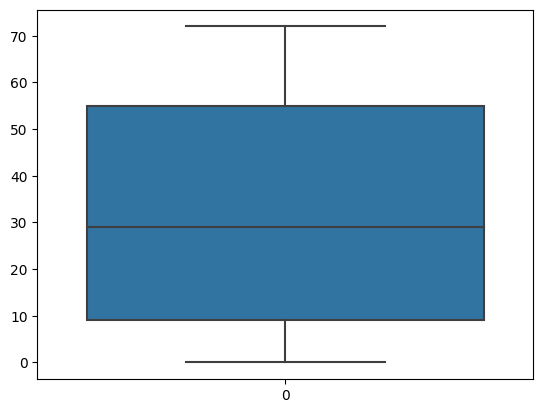

In [23]:
bx = sns.boxplot(df1['tenure'])
bx

<Axes: >

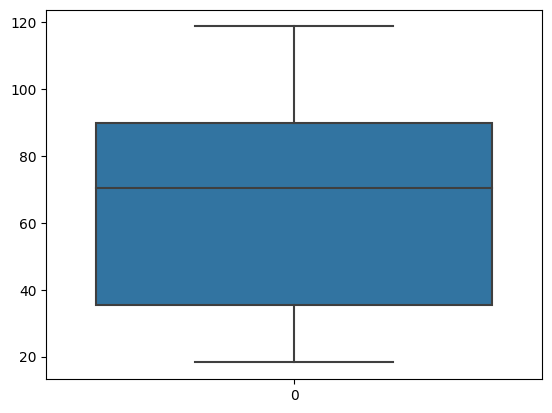

In [24]:
bx = sns.boxplot(df1['MonthlyCharges'])
bx

<Axes: >

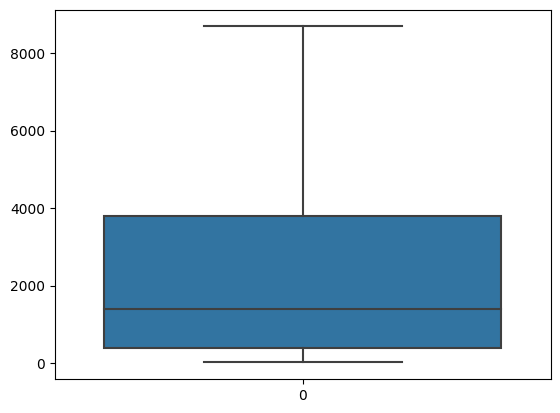

In [25]:
bx = sns.boxplot(df1['TotalCharges'])
bx

In [ ]:
# We can use scatter plot to detect outliers

plt.scatter(x = df['tenure'], y =df['tenure'])

# Feature Scaling

In [26]:
f = ['tenure', 'MonthlyCharges', 'TotalCharges']

f1 = pd.DataFrame(df1, columns=f)
f1

df_remaining_features = df1.drop(columns=f1)
df_remaining_features

mns = MinMaxScaler()
rescaled_feature = mns.fit_transform(f1)

In [27]:
rescaled_feature

array([[0.01388889, 0.11542289, 0.0012751 ],
       [0.47222222, 0.38507463, 0.21586661],
       [0.02777778, 0.35422886, 0.01031041],
       ...,
       [0.15277778, 0.11293532, 0.03780868],
       [0.05555556, 0.55870647, 0.03321025],
       [0.91666667, 0.86965174, 0.78764136]])

In [28]:
df1.dropna()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1.0,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34.0,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2.0,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45.0,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2.0,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24.0,1,1,84.80,1990.50,0,...,0,0,1,0,1,0,0,0,0,1
7039,1,0,1,1,72.0,1,1,103.20,7362.90,0,...,0,0,1,0,1,0,0,1,0,0
7040,1,0,1,1,11.0,0,1,29.60,346.45,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4.0,1,1,74.40,306.60,1,...,1,0,0,1,0,0,0,0,0,1


In [29]:
df1['TotalCharges'].isna().sum()

11

In [30]:
d = df1['TotalCharges'].mean()
d

2283.3004408418656

In [31]:
df1['TotalCharges'].fillna(d, inplace=True)

In [32]:
df1['TotalCharges'].isna().sum()

0

# Train-Test-Split

In [33]:
x1 = df1.drop('Churn', axis=1)
x = x1.values
y = df1['Churn'].values

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [34]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [35]:
x

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Model Selection, Training, Prediction and Assessment

In [36]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [37]:
y_pred = model.predict(x_test)
y_pred[0:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
y_test[0:10]

array([1, 0, 0, 1, 0, 1, 0, 0, 1, 1], dtype=int64)

In [39]:
y_pred_train = model.predict(x_train)
y_pred_train[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [40]:
y_train[0:10]

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [41]:
### Testing Data 

def model_eval(actual,pred):
    acc = accuracy_score(actual,pred)
    print(f"Accuracy Score = {acc}")
    
    cm = confusion_matrix(actual,pred)
    print(f"Confusion Matrix = \n {cm}")
    
    cr = classification_report(actual,pred)
    print(f"classification Report = \n{cr}")
    
    return "Success"
model_eval(y_test,y_pred)

Accuracy Score = 0.794180269694819
Confusion Matrix = 
 [[939  97]
 [193 180]]
classification Report = 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.48      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



'Success'

In [42]:
### Training Data 

def model_eval(actual,pred):
    acc = accuracy_score(actual,pred)
    print(f"Accuracy Score = {acc}")
    
    cm = confusion_matrix(actual,pred)
    print(f"Confusion Matrix = \n {cm}")
    
    cr = classification_report(actual,pred)
    print(f"classification Report = \n{cr}")
    
    return "Success"
model_eval(y_train,y_pred_train)

Accuracy Score = 0.9985800496982605
Confusion Matrix = 
 [[4134    4]
 [   4 1492]]
classification Report = 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4138
           1       1.00      1.00      1.00      1496

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634



'Success'

# HyperParameter Tuning

In [43]:
model_hyp = RandomForestClassifier()


random_grid = {'n_estimators': np.arange(10,100),
               'max_depth': [3, 6, 9],
               'max_leaf_nodes': [3, 6, 9],
               }

rscv = RandomizedSearchCV(model_hyp, random_grid, cv = 5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [3, 6, 9],
                                        'max_leaf_nodes': [3, 6, 9],
                                        'n_estimators': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
       78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94,
       95, 96, 97, 98, 99])})

In [44]:
print(rscv.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=52)


In [45]:
model_random = RandomForestClassifier(max_depth=9,
                                      max_leaf_nodes=9,
                                      n_estimators=52)
model_random.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=52)

In [46]:
# Predicting on Testing data
y_pred_rand_cv = model_random.predict(x_test)
y_pred_rand_cv

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# Predicting on Training Data

y_pred_rand_train_cv = model_random.predict(x_train)
y_pred_rand_train_cv

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [48]:
### Testing Data 

def model_eval(actual,pred):
    acc = accuracy_score(actual,pred)
    print(f"Accuracy Score = {acc}")
    
    cm = confusion_matrix(actual,pred)
    print(f"Confusion Matrix = \n {cm}")
    
    cr = classification_report(actual,pred)
    print(f"classification Report = \n{cr}")
    
    return "Success"
model_eval(y_test,y_pred_rand_cv)

Accuracy Score = 0.7991483321504613
Confusion Matrix = 
 [[968  68]
 [215 158]]
classification Report = 
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1036
           1       0.70      0.42      0.53       373

    accuracy                           0.80      1409
   macro avg       0.76      0.68      0.70      1409
weighted avg       0.79      0.80      0.78      1409



'Success'

In [49]:
### Training Data 

def model_eval(actual,pred):
    acc = accuracy_score(actual,pred)
    print(f"Accuracy Score = {acc}")
    
    cm = confusion_matrix(actual,pred)
    print(f"Confusion Matrix = \n {cm}")
    
    cr = classification_report(actual,pred)
    print(f"classification Report = \n{cr}")
    
    return "Success"
model_eval(y_train,y_pred_rand_train_cv)

Accuracy Score = 0.7971246006389776
Confusion Matrix = 
 [[3893  245]
 [ 898  598]]
classification Report = 
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      4138
           1       0.71      0.40      0.51      1496

    accuracy                           0.80      5634
   macro avg       0.76      0.67      0.69      5634
weighted avg       0.79      0.80      0.78      5634



'Success'

# Feature Importances

In [50]:
model_random.feature_importances_

array([0.        , 0.00049485, 0.00183142, 0.        , 0.13065914,
       0.        , 0.00885049, 0.04241222, 0.08879209, 0.00510148,
       0.        , 0.0003122 , 0.        , 0.02436214, 0.04410313,
       0.02077381, 0.16916279, 0.01832931, 0.01304826, 0.01730177,
       0.00782919, 0.00566559, 0.00735506, 0.01730354, 0.0019653 ,
       0.06972355, 0.00195818, 0.01263734, 0.        , 0.00689434,
       0.        , 0.        , 0.00847636, 0.00131638, 0.13352101,
       0.02212173, 0.0652389 , 0.        , 0.00184722, 0.04964766,
       0.00096352])

In [51]:
s1 = pd.Series(model_random.feature_importances_, index = x1.columns)
s1.sort_values(ascending=False)

OnlineSecurity_No                          0.169163
Contract_Month-to-month                    0.133521
tenure                                     0.130659
TotalCharges                               0.088792
TechSupport_No                             0.069724
Contract_Two year                          0.065239
PaymentMethod_Electronic check             0.049648
InternetService_Fiber optic                0.044103
MonthlyCharges                             0.042412
InternetService_DSL                        0.024362
Contract_One year                          0.022122
InternetService_No                         0.020774
OnlineSecurity_No internet service         0.018329
DeviceProtection_No internet service       0.017304
OnlineBackup_No                            0.017302
OnlineSecurity_Yes                         0.013048
TechSupport_Yes                            0.012637
PaperlessBilling                           0.008850
StreamingMovies_No internet service        0.008476
OnlineBackup

In [52]:
import pickle

In [53]:
# Save the model to the disk

filename = "Final_Model.pickle"

pickle.dump(model_random, open(filename, 'wb'))

In [55]:
# load the model from disk

loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(x_test, y_test)

print(result)

0.7991483321504613


In [55]:
loaded_model = pickle.load(open(filename, 'rb'))

result = loaded_model.score(x_train, y_train)

print(result)

0.7909123180688676
